# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

You can use patsy instead of pandas to handle the categorical variables if you like.

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Load the data (use delim_whitespace=True)
df = pd.read_csv('http://data.princeton.edu/wws509/datasets/salary.dat', delim_whitespace=True)
# Take a look
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [3]:
# Apply value_counts() to series for "sx", "dg", and "rk"
print(df.sx.value_counts())
print('')
print(df.dg.value_counts())
print('')
print(df.rk.value_counts())

male      38
female    14
Name: sx, dtype: int64

doctorate    34
masters      18
Name: dg, dtype: int64

full         20
assistant    18
associate    14
Name: rk, dtype: int64


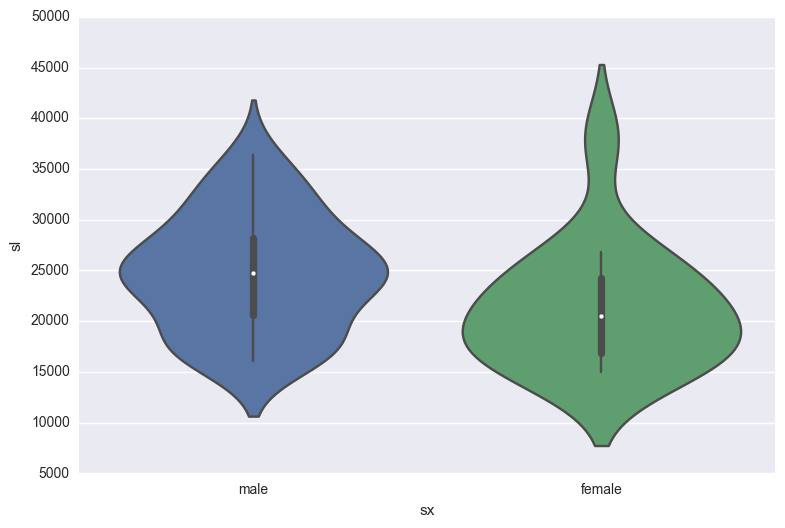

In [4]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Do the same for "dg" and "rk"

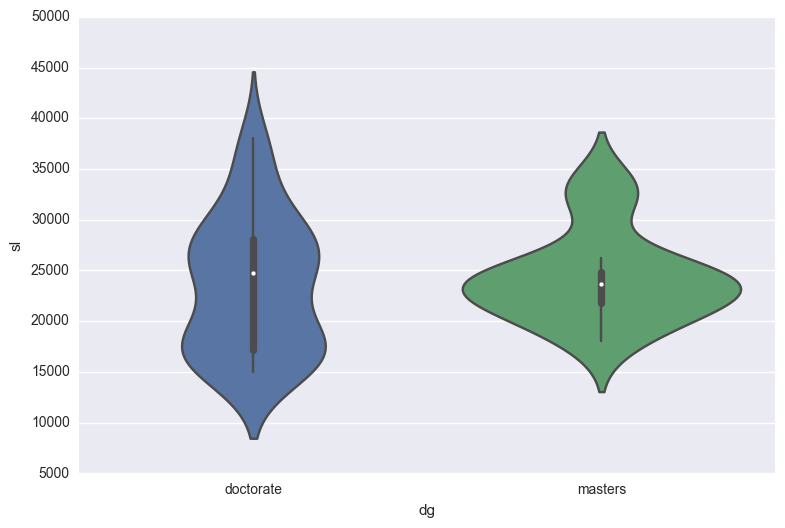

In [5]:
sns.violinplot(x="dg", y="sl", data=df)
plt.show()

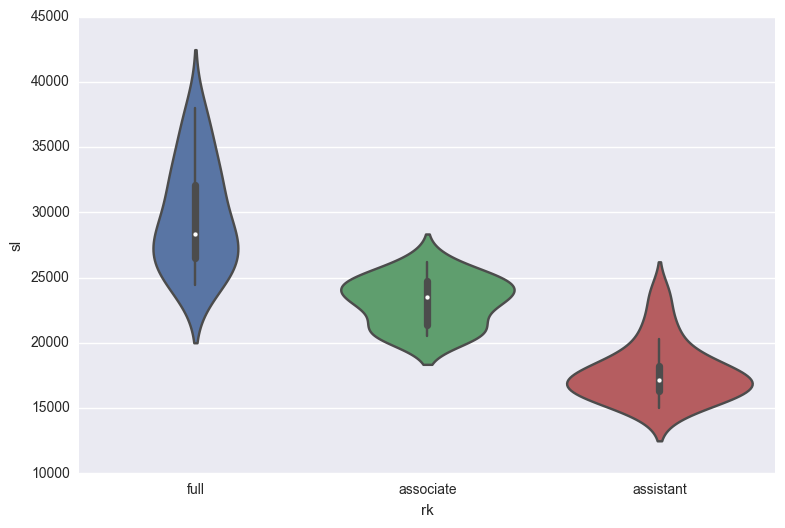

In [6]:
sns.violinplot(x="rk", y="sl", data=df)
plt.show()

In [7]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,male,full,13,doctorate,22,35350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,male,full,10,doctorate,23,28200,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,female,full,7,doctorate,27,26775,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,male,full,19,masters,30,33696,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Here's an example to get you started.

Try reruning the next cell multiple times. You should see an improvement for some samples.

In [8]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", model.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", model.score(X, y)

# Did the results improve?

Sample: 0.529899714463
All data with sample model: 0.342854109366
Sample with regularization: 0.529289829257
All data with regularization model: 0.360996621001


Yes, the results improved

r2_score for males on male model: 0.88630543814


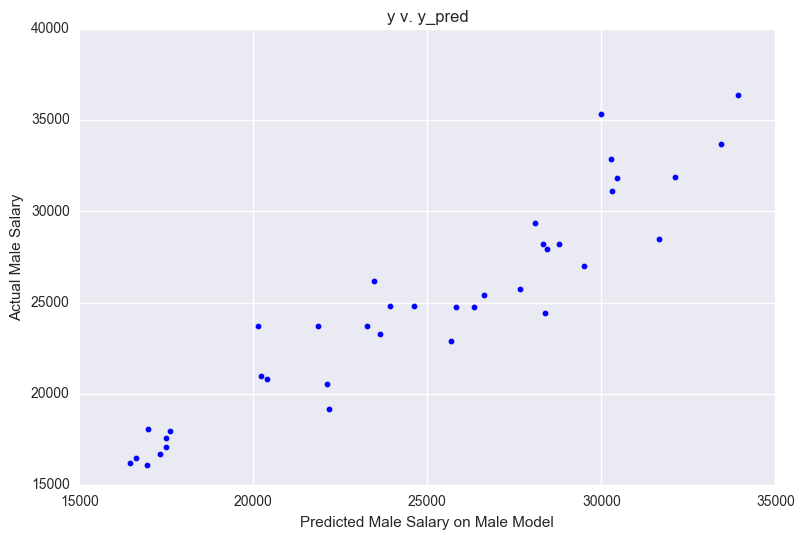

In [9]:
# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

mask2 = df["sx"] == "female"
X2 = df[mask2][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y2 = df[mask2][u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
lm.fit(X, y)
y_pred = lm.predict(X)

## Plot the data
plt.scatter(y_pred, y)
plt.xlabel('Predicted Male Salary on Male Model')
plt.ylabel('Actual Male Salary')
plt.title('y v. y_pred')

## and print the model score
print 'r2_score for males on male model:', r2_score(y, y_pred)

r2_score for females on male model: 0.69448811957


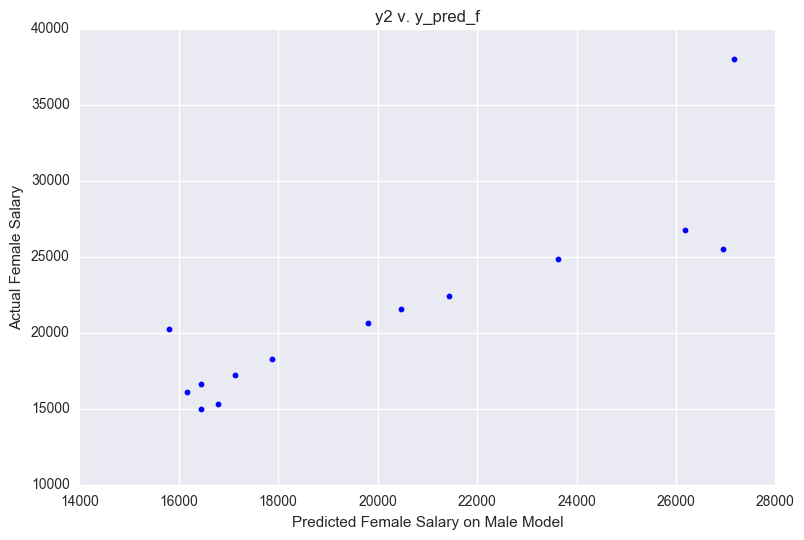

In [10]:
# Apply the same model to the women and compare the model score
y_pred_f = lm.predict(X2)

## Plot the data
plt.scatter(y_pred_f, y2)
plt.xlabel('Predicted Female Salary on Male Model')
plt.ylabel('Actual Female Salary')
plt.title('y2 v. y_pred_f')

## and print the model score
print 'r2_score for females on male model:', r2_score(y2, y_pred_f)

r2_score for females on female model: 0.781837240731


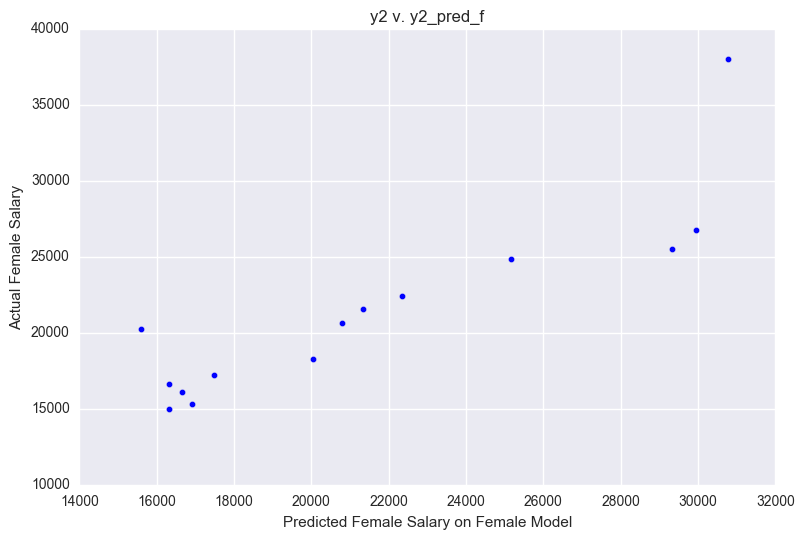

In [11]:
# What about the other order? Apply to women first

## Fit a linear model here
lm = linear_model.LinearRegression()
lm.fit(X2, y2)
y2_pred = lm.predict(X2)

## Plot the data
plt.scatter(y2_pred, y2)
plt.xlabel('Predicted Female Salary on Female Model')
plt.ylabel('Actual Female Salary')
plt.title('y2 v. y2_pred_f')
## and print the model score
print 'r2_score for females on female model:', r2_score(y2, y2_pred)

r2_score for males on female model: 0.657523429275


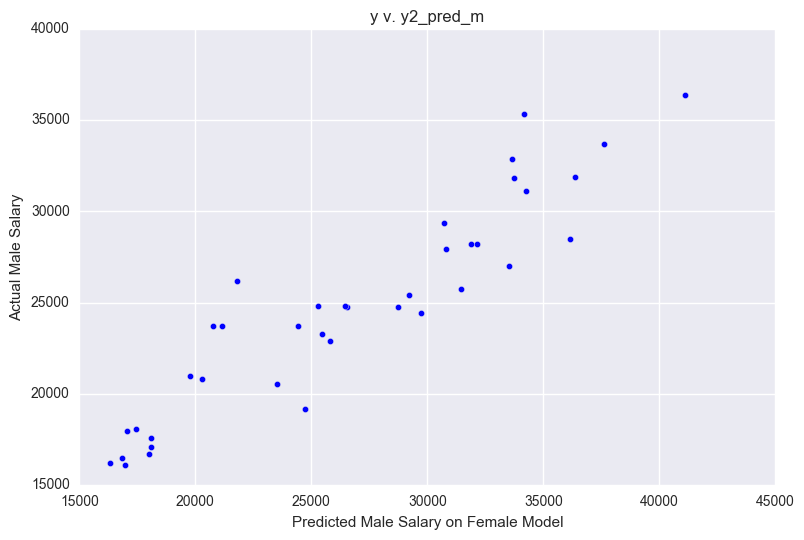

In [12]:
# Apply to men

## Fit a linear model here
y_pred = lm.predict(X)

## Plot the data
plt.scatter(y_pred, y)
plt.xlabel('Predicted Male Salary on Female Model')
plt.ylabel('Actual Male Salary')
plt.title('y v. y2_pred_m')

## and print the model score
print 'r2_score for males on female model:', r2_score(y, y_pred)

In [13]:
alpha_range = np.arange(0.01,1,0.01)

In [14]:
# This time use regularlization (RidgeCV)

# Apply to women first
rr = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
rr.fit(X2, y2)

# predict method uses the best alpha value
y2_pred = rr.predict(X2)

print 'Using alpha = ', rr.alpha_
print "r2_score for female data on the female model with regularization:", r2_score(y2, y2_pred)

y_pred = rr.predict(X)
print 'r2_score for male data on female model with regularization:', r2_score(y, y_pred)

print ''
# Apply to men
rr = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
rr.fit(X, y)

# predict method uses the best alpha value
y_pred = rr.predict(X)

print 'Using alpha = ', rr.alpha_
print "r2_score for male data on the male model with regularization:", r2_score(y, y_pred)

y2_pred = rr.predict(X2)
print 'r2_score for female data on male model with regularization:', r2_score(y2, y2_pred)

Using alpha =  0.33
r2_score for female data on the female model with regularization: 0.759516954199
r2_score for male data on female model with regularization: 0.816477349361

Using alpha =  0.01
r2_score for male data on the male model with regularization: 0.885999350307
r2_score for female data on male model with regularization: 0.705615956013


### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

r2_score for male data on the female model without ridgeCV was 0.65; however, the r2_score for male data on the female model built WITH ridgeCV was 0.82, so yes, regularization did improve the 2nd fit.

It does not have as much of an improvement with female data on male model, jumping from 0.69 to 0.71.

In [15]:
mask = (df["dg"] == "doctorate")

X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']

mask2 = (df["dg"] != "doctorate") # !=
X2 = df[mask2][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female',
       u'sx_male']]
y2 = df[mask2][u'sl']

lm = linear_model.LinearRegression()
lm.fit(X, y)
y_pred = lm.predict(X)
print "r2_score for doctorates on doctorate model:", r2_score(y, y_pred)

# Apply to the masters data set
y2_pred = lm.predict(X2)
print "r2_score for masters on doctorate model:", r2_score(y2, y2_pred)

r2_score for doctorates on doctorate model: 0.876486548837
r2_score for masters on doctorate model: 0.6849888843


In [16]:
# Reverse the order
lm = linear_model.LinearRegression()
lm.fit(X2, y2)
y2_pred = lm.predict(X)
print "r2_score for masters on masters model:", lm.score(X2, y2)

# Apply to the doctorate data set
y_pred = lm.predict(X)
print "r2_score for doctorate on masters model:", r2_score(y, y_pred)

r2_score for masters on masters model: 0.797682614586
r2_score for doctorate on masters model: 0.745050571834


In [17]:
# With regularization

# Build regularized model using masters data
rr = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
rr.fit(X2, y2)

# predict method uses the best alpha value
y2_pred = rr.predict(X2)
print 'Using alpha = ', rr.alpha_
print "r2_score for masters data on the masters model with regularization:", r2_score(y2, y2_pred)

# Apply to doctorate
y_pred = rr.predict(X)
print 'r2_score for doctorate data on masters model with regularization:', r2_score(y, y_pred)

print ''

rr = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
rr.fit(X, y)

# predict method uses the best alpha value
y_pred = rr.predict(X)
print 'Using alpha = ', rr.alpha_
print "r2_score for doctorate data on the doctorate model with regularization:", r2_score(y, y_pred)

# Apply to masters
y2_pred = rr.predict(X2)
print 'r2_score for masters data on doctorate model with regularization:', r2_score(y2, y2_pred)

Using alpha =  0.01
r2_score for masters data on the masters model with regularization: 0.797462454671
r2_score for doctorate data on masters model with regularization: 0.750026178539

Using alpha =  0.12
r2_score for doctorate data on the doctorate model with regularization: 0.871966165933
r2_score for masters data on doctorate model with regularization: 0.512256482533


### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

In [18]:
mask = (df["rk"] == "full") # First subset, there are two more
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']

mask2 = (df["rk"] == "associate")
X2 = df[mask2][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y2 = df[mask2][u'sl']

mask3 = (df["rk"] == "assistant")
X3 = df[mask3][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y3 = df[mask3][u'sl']


lm = linear_model.LinearRegression() # Try different alphas
lm.fit(X, y)
y_pred = lm.predict(X)
print "r2_score for full data on full model:", r2_score(y, y_pred)

y2_pred = lm.predict(X2)
print "r2_score for associate on full model:", r2_score(y2, y2_pred)

y3_pred = lm.predict(X3)
print "r2_score for assistant on full model:", r2_score(y3, y3_pred)

print ''

rr = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
rr.fit(X, y)
y_pred = rr.predict(X)
print 'Using alpha = ', rr.alpha_
print "r2_score for full data on full model with ridge:", r2_score(y, y_pred)

# Apply to the masters data set
y2_pred = rr.predict(X2)
print "r2_score for associate on full model with ridge:", r2_score(y2, y2_pred)

y3_pred = rr.predict(X3)
print "r2_score for assistant on full model with ridge:", r2_score(y3, y3_pred)

r2_score for full data on full model: 0.518546885368
r2_score for associate on full model: -7.45265423236
r2_score for assistant on full model: -18.353149193

Using alpha =  0.13
r2_score for full data on full model with ridge: 0.500497138949
r2_score for associate on full model with ridge: -7.26645495789
r2_score for assistant on full model with ridge: -14.7438388477


In [19]:
# The second permutation of three

lm = linear_model.LinearRegression() # Try different alphas
lm.fit(X2, y2)
y2_pred = lm.predict(X2)
print "r2_score for associate data on associate model:", r2_score(y2, y2_pred)

y_pred = lm.predict(X)
print "r2_score for full on associate model:", r2_score(y, y_pred)

y3_pred = lm.predict(X3)
print "r2_score for assistant on associate model:", r2_score(y3, y3_pred)

print ''

rr = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
rr.fit(X2, y2)
y2_pred = rr.predict(X2)
print 'Using alpha = ', rr.alpha_
print "r2_score for associate data on associate model with ridge:", r2_score(y2, y2_pred)

# Apply to the masters data set
y_pred = rr.predict(X)
print "r2_score for full on associate model with ridge:", r2_score(y, y_pred)

y3_pred = rr.predict(X3)
print "r2_score for assistant on associate model with ridge:", r2_score(y3, y3_pred)

r2_score for associate data on associate model: 0.621136292896
r2_score for full on associate model: -2.60749883815
r2_score for assistant on associate model: -7.96517263065

Using alpha =  0.02
r2_score for associate data on associate model with ridge: 0.619337682922
r2_score for full on associate model with ridge: -2.59512681265
r2_score for assistant on associate model with ridge: -7.6613653155


In [20]:
# The third permutation of three

lm = linear_model.LinearRegression()
lm.fit(X3, y3)
y3_pred = lm.predict(X3)
print "r2_score for assistant data on assistant model:", r2_score(y3, y3_pred)

y_pred = lm.predict(X)
print "r2_score for full on assistant model:", r2_score(y, y_pred)

y2_pred = lm.predict(X2)
print "r2_score for associate on assistant model:", r2_score(y2, y2_pred)

print ''

rr = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
rr.fit(X3, y3)
y3_pred = rr.predict(X3)
print 'Using alpha = ', rr.alpha_
print "r2_score for assistant data on assistant model with ridge:", r2_score(y3, y3_pred)

y_pred = rr.predict(X)
print "r2_score for full on assistant model with ridge:", r2_score(y, y_pred)

y2_pred = rr.predict(X2)
print "r2_score for associate on assistant model with ridge:", r2_score(y2, y2_pred)

r2_score for assistant data on assistant model: 0.515603387509
r2_score for full on assistant model: -8.39910384198
r2_score for associate on assistant model: -5.80743845944

Using alpha =  0.99
r2_score for assistant data on assistant model with ridge: 0.480504253033
r2_score for full on assistant model with ridge: -7.33369932438
r2_score for associate on assistant model with ridge: -5.4433684845


# Results

How did the regularized models fare?

When splitting the data by rank, the salaries between full, associate and assistant professors varied so much from one another that the residuals of each rank on another model were so high that SSE greatly outperformed SSTO, thus giving rise to negative R^2 values. So, while ridge regression did help a little, we shouldn't be modeling ranks on a model built using a different rank.

### Bonus

Try predicting "yd" by splitting the data on "sx".

In [21]:
# Without regularization
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']

mask2 = df["sx"] == "female"
X2 = df[mask2][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y2 = df[mask2][u'yd']

lm = linear_model.LinearRegression() # Try different alphas
lm.fit(X, y)
y_pred = lm.predict(X)
print "r2_score for male data on male model:", r2_score(y, y_pred)

y2_pred = lm.predict(X2)
print "r2_score for female data on male model:", r2_score(y2, y2_pred)

print ''

lm = linear_model.LinearRegression() # Try different alphas
lm.fit(X2, y2)
y2_pred = lm.predict(X2)
print "r2_score for female data on female model:", r2_score(y2, y2_pred)

y_pred = lm.predict(X)
print "r2_score for male data on female model:", r2_score(y, y_pred)

r2_score for male data on male model: 0.835108948531
r2_score for female data on male model: 0.57609191241

r2_score for female data on female model: 0.926177658276
r2_score for male data on female model: 0.0479508851501


In [22]:
# With regularization, RidgeCV
rr = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
rr.fit(X, y)
y_pred = rr.predict(X)
print 'Using alpha = ', rr.alpha_
print "r2_score for male data on male model with ridge:", r2_score(y, y_pred)

y2_pred = rr.predict(X2)
print "r2_score for female data on male model with ridge:", r2_score(y2, y2_pred)

print ''

rr = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
rr.fit(X2, y2)
y2_pred = rr.predict(X2)
print 'Using alpha = ', rr.alpha_
print "r2_score for female data on female model with ridge:", r2_score(y2, y2_pred)

y_pred = rr.predict(X)
print "r2_score for male data on female model with ridge:", r2_score(y, y_pred)

Using alpha =  0.02
r2_score for male data on male model with ridge: 0.833119190482
r2_score for female data on male model with ridge: 0.594309908986

Using alpha =  0.48
r2_score for female data on female model with ridge: 0.900563285247
r2_score for male data on female model with ridge: 0.342777134395


#### Getting an Error when fitting lasso ??

alpha: 0.1
0.924651162377


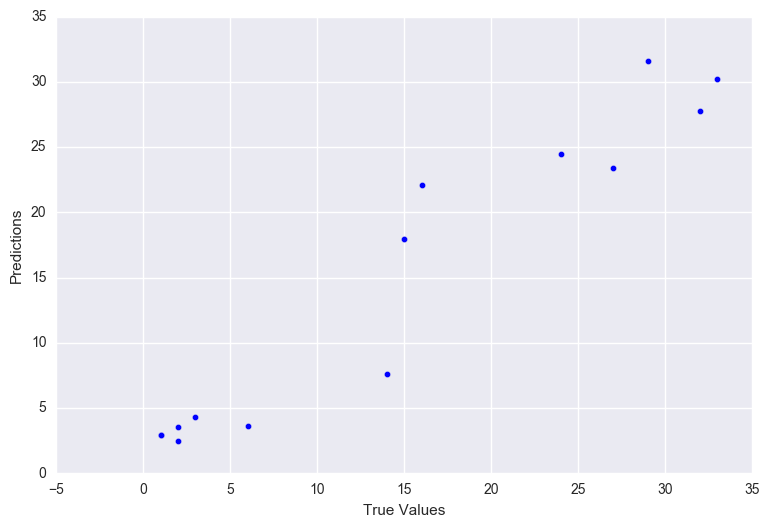

0.0630933485075


In [23]:
## Sam's Code: This works


mask = df["sx"] == "female"
X = df[mask][[u'sl', u'yr',
      u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
      u'dg_masters']]
y = df[mask][u'yd']

# lm = linear_model.LinearRegression()
lm = linear_model.LassoCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = df["sx"] == "male"
X = df[mask][[u'sl', u'yr',
      u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
      u'dg_masters']]
y = df[mask][u'yd']
print lm.score(X, y)

In [24]:
## My code, this doesn't work??


# With regularization, LassoCV
lasso = linear_model.LassoCV(alpha_range, normalize = True) # Try different alphas
model = lasso.fit(X, y)
y_pred = lasso.predict(X)
print 'Using alpha = ', lasso.alpha_
print "r2_score for male data on male model with lasso:", r2_score(y, y_pred)

y2_pred = lasso.predict(X2)
print "r2_score for female data on male model with lasso:", r2_score(y2, y2_pred)

print ''

lasso = linear_model.RidgeCV(alpha_range, normalize=True) # Try different alphas
lasso.fit(X2, y2)
y2_pred = lasso.predict(X2)
print 'Using alpha = ', lasso.alpha_
print "r2_score for female data on female model with lasso:", r2_score(y2, y2_pred)

y_pred = lasso.predict(X)
print "r2_score for male data on female model with lasso:", r2_score(y, y_pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()